# Project ---> E-Commerce Insights from Flipkart Data Using Python and EDA

#### Importing Libraries

In [44]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re

#### Initializing the lists

In [45]:
product_name = []
product_price = []
product_rating = []
product_display = []
product_camera = []
product_processor = []
product_ram = []

#### Adding Request Headers

In [46]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 "
                  "(KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
}

#### Scrapping the flipkart data

In [47]:
for page in range(1, 21):
    url = f"https://www.flipkart.com/search?q=realme+5g+mobile&page={page}"
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    # Identifing product cards
    products = soup.find_all("div", {"data-id": True})

    for p in products:
        # Product Names
        name_tag = p.find("a", {"class": "wjcEIp"})
        if not name_tag:
            name_tag = p.find("div", {"class": "KzDlHZ"})
        product_name.append(name_tag.text.strip() if name_tag else np.nan)

        # Product Price
        price_tag = p.find("div", {"class": "Nx9bqj"})
        product_price.append(re.sub(r"\D", "", price_tag.text) if price_tag else np.nan)

        # Product Rating
        rating_tag = p.find("div", {"class": "XQDdHH"})
        product_rating.append(rating_tag.text if rating_tag else np.nan)

        # Features (Display, Camera, Processor, RAM)
        features = p.find_all("li")
        disp, cam, proc, ram = np.nan, np.nan, np.nan, np.nan
        for f in features:
            text = f.text
            if "Display" in text:
                disp = text
            elif "Camera" in text:
                cam = text
            elif "Processor" in text:
                proc = text.replace("Processor", "").strip()
            elif "RAM" in text:
                ram = text
        product_display.append(disp)
        product_camera.append(cam)
        product_processor.append(proc)
        product_ram.append(ram)

#### Finding the lengths

In [48]:
print('Name     :', len(product_name))
print('Price    :', len(product_price))
print('Rating   :', len(product_rating))
print('Display  :', len(product_display))
print('Camera   :', len(product_camera))
print('Processor:', len(product_processor))
print('RAM      :', len(product_ram))

Name     : 480
Price    : 480
Rating   : 480
Display  : 480
Camera   : 480
Processor: 480
RAM      : 480


#### Creating the DataFrame

In [49]:
product_df = pd.DataFrame({
    'Product Name': product_name,
    'Product Price': product_price,
    'Product Rating': product_rating,
    'Product Display': product_display,
    'Product Camera': product_camera,
    'Product Processor': product_processor,
    'Product RAM': product_ram
})

print("\nInitial DataFrame shape:", product_df.shape)


Initial DataFrame shape: (480, 7)


#### Cleaning the data

In [50]:
product_df['Product Color'] = product_df['Product Name'].apply(
    lambda x: re.findall(r'\(([^,]+),', str(x))[0] if re.findall(r'\(([^,]+),', str(x)) else np.nan
)

product_df['Product ROM'] = product_df['Product Name'].apply(
    lambda x: re.findall(r',\s*(\d+)\s*GB\)', str(x))[0] if re.findall(r',\s*(\d+)\s*GB\)', str(x)) else np.nan
)

product_df['Product Name'] = product_df['Product Name'].apply(
    lambda x: re.search(r"^(.*?5G)", str(x)).group(1) if re.search(r"^(.*?5G)", str(x)) else re.sub(r"\s*\(.*?\)", "", str(x))
)

product_df['Product RAM'] = product_df['Product RAM'].apply(
    lambda x: re.search(r'\d+\s*GB\s*RAM', str(x)).group(0) if re.search(r'\d+\s*GB\s*RAM', str(x)) else np.nan
)

# Step 5: Output
print("\nFinal DataFrame shape:", product_df.shape)
product_df.head()


Final DataFrame shape: (480, 9)


,Product Name,Product Price,Product Rating,Product Display,Product Camera,Product Processor,Product RAM,Product Color,Product ROM
0,realme P3x 5G,11499,4.4,17.07 cm (6.72 inch) Full HD Display,50MP Rear Camera | 8MP Front Camera,Dimensity 6400,6 GB RAM,Midnight Blue,128
1,realme P3x 5G,12999,4.4,17.07 cm (6.72 inch) Full HD Display,50MP Rear Camera | 8MP Front Camera,Dimensity 6400,8 GB RAM,Midnight Blue,128
2,realme 15x 5G,19999,4.3,17.27 cm (6.8 inch) Display,50MP Rear Camera | 50MP Front Camera,Dimensity 6300 6nm Octa-core chipset,8 GB RAM,Marine Blue,256
3,realme Narzo 80 Lite 5G,10312,4.3,16.94 cm (6.67 inch) Display,50MP Rear Camera,NaN,4 GB RAM,Onyx Black,128
4,realme 15x 5G,16999,4.4,17.27 cm (6.8 inch) Display,50MP Rear Camera | 50MP Front Camera,Dimensity 6300 6nm Octa-core chipset,6 GB RAM,Marine Blue,128


In [51]:
product_df.columns

Index(['Product Name', 'Product Price', 'Product Rating', 'Product Display',
       'Product Camera', 'Product Processor', 'Product RAM', 'Product Color',
       'Product ROM'],
      dtype='object')

#### Creating Perfect DataFrame

In [52]:
product_df = product_df[['Product Name', 'Product Price', 'Product Camera', 'Product RAM', 'Product ROM', 'Product Display', 'Product Processor', 'Product Color', 'Product Rating']]
product_df

,Product Name,Product Price,Product Camera,Product RAM,Product ROM,Product Display,Product Processor,Product Color,Product Rating
0,realme P3x 5G,11499,50MP Rear Camera | 8MP Front Camera,6 GB RAM,128,17.07 cm (6.72 inch) Full HD Display,Dimensity 6400,Midnight Blue,4.4
1,realme P3x 5G,12999,50MP Rear Camera | 8MP Front Camera,8 GB RAM,128,17.07 cm (6.72 inch) Full HD Display,Dimensity 6400,Midnight Blue,4.4
2,realme 15x 5G,19999,50MP Rear Camera | 50MP Front Camera,8 GB RAM,256,17.27 cm (6.8 inch) Display,Dimensity 6300 6nm Octa-core chipset,Marine Blue,4.3
3,realme Narzo 80 Lite 5G,10312,50MP Rear Camera,4 GB RAM,128,16.94 cm (6.67 inch) Display,NaN,Onyx Black,4.3
4,realme 15x 5G,16999,50MP Rear Camera | 50MP Front Camera,6 GB RAM,128,17.27 cm (6.8 inch) Display,Dimensity 6300 6nm Octa-core chipset,Marine Blue,4.4
...,...,...,...,...,...,...,...,...,...
475,realme GT 2 Pro,29999,50MP + 50MP + 2MP | 32MP Front Camera,12 GB RAM,256,17.02 cm (6.7 inch) Quad HD Display,Qualcomm Snapdragon 8 Gen 1 Mobile Platform,Paper White,4.3
476,realme 10 Pro 5G,12999,108MP + 2MP | 16MP Front Camera,6 GB RAM,128,17.07 cm (6.72 inch) Full HD+ Display,Qualcomm Snapdragon 695 5G,Hyperspace,4.3
477,realme GT 2 Pro,21999,50MP + 50MP + 2MP | 32MP Front Camera,8 GB RAM,128,17.02 cm (6.7 inch) Quad HD Display,Qualcomm Snapdragon 8 Gen 1 Mobile Platform,Paper Green,4.2
478,realme GT 2 Pro,21999,50MP + 50MP + 2MP | 32MP Front Camera,8 GB RAM,128,17.02 cm (6.7 inch) Quad HD Display,Qualcomm Snapdragon 8 Gen 1 Mobile Platform,Paper White,4.2


In [53]:
product_df.to_csv("realme_flipkart_data.csv", index=False)

### Reading the CSV File

In [54]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('realme_flipkart_data.csv')

In [55]:
print('Total Rows and Columns:', df.shape)
print('Total Rows            :', len(df.index))
print('Total Columns         :', len(df.columns))
print('****************************************')
print('Total Null Values in Each Column:')
print(df.isnull().sum())
print('****************************************')
print('Data Types of Each Column:')
print(df.dtypes)

Total Rows and Columns: (480, 9)
Total Rows            : 480
Total Columns         : 9
****************************************
Total Null Values in Each Column:
Product Name          0
Product Price         0
Product Camera        1
Product RAM           0
Product ROM           2
Product Display       0
Product Processor    63
Product Color         0
Product Rating        2
dtype: int64
****************************************
Data Types of Each Column:
Product Name          object
Product Price          int64
Product Camera        object
Product RAM           object
Product ROM          float64
Product Display       object
Product Processor     object
Product Color         object
Product Rating       float64
dtype: object


#### Handling Missing Values 

In [56]:
df.fillna('Unavalible', inplace = True)

In [57]:
print('Total Null Values After Handling Missing Values:')
print(df.isnull().sum())

Total Null Values After Handling Missing Values:
Product Name         0
Product Price        0
Product Camera       0
Product RAM          0
Product ROM          0
Product Display      0
Product Processor    0
Product Color        0
Product Rating       0
dtype: int64


### Basic Information of the DataSet

In [58]:
print('Top 5 Rows of the DataSet:')
df.head()

Top 5 Rows of the DataSet:


,Product Name,Product Price,Product Camera,Product RAM,Product ROM,Product Display,Product Processor,Product Color,Product Rating
0,realme P3x 5G,11499,50MP Rear Camera | 8MP Front Camera,6 GB RAM,128.0,17.07 cm (6.72 inch) Full HD Display,Dimensity 6400,Midnight Blue,4.4
1,realme P3x 5G,12999,50MP Rear Camera | 8MP Front Camera,8 GB RAM,128.0,17.07 cm (6.72 inch) Full HD Display,Dimensity 6400,Midnight Blue,4.4
2,realme 15x 5G,19999,50MP Rear Camera | 50MP Front Camera,8 GB RAM,256.0,17.27 cm (6.8 inch) Display,Dimensity 6300 6nm Octa-core chipset,Marine Blue,4.3
3,realme Narzo 80 Lite 5G,10312,50MP Rear Camera,4 GB RAM,128.0,16.94 cm (6.67 inch) Display,Unavalible,Onyx Black,4.3
4,realme 15x 5G,16999,50MP Rear Camera | 50MP Front Camera,6 GB RAM,128.0,17.27 cm (6.8 inch) Display,Dimensity 6300 6nm Octa-core chipset,Marine Blue,4.4


In [59]:
print('Last 5 Rows of DataSet:')
df.tail()

Last 5 Rows of DataSet:


,Product Name,Product Price,Product Camera,Product RAM,Product ROM,Product Display,Product Processor,Product Color,Product Rating
475,realme GT 2 Pro,29999,50MP + 50MP + 2MP | 32MP Front Camera,12 GB RAM,256.0,17.02 cm (6.7 inch) Quad HD Display,Qualcomm Snapdragon 8 Gen 1 Mobile Platform,Paper White,4.3
476,realme 10 Pro 5G,12999,108MP + 2MP | 16MP Front Camera,6 GB RAM,128.0,17.07 cm (6.72 inch) Full HD+ Display,Qualcomm Snapdragon 695 5G,Hyperspace,4.3
477,realme GT 2 Pro,21999,50MP + 50MP + 2MP | 32MP Front Camera,8 GB RAM,128.0,17.02 cm (6.7 inch) Quad HD Display,Qualcomm Snapdragon 8 Gen 1 Mobile Platform,Paper Green,4.2
478,realme GT 2 Pro,21999,50MP + 50MP + 2MP | 32MP Front Camera,8 GB RAM,128.0,17.02 cm (6.7 inch) Quad HD Display,Qualcomm Snapdragon 8 Gen 1 Mobile Platform,Paper White,4.2
479,realme GT 2 Pro,21999,50MP + 50MP + 2MP | 32MP Front Camera,8 GB RAM,128.0,17.02 cm (6.7 inch) Quad HD Display,Qualcomm Snapdragon 8 Gen 1 Mobile Platform,Steel Black,4.2


In [61]:
print('Unique Values in DataSet:')
df.nunique()

Unique Values in DataSet:


Product Name          94
Product Price        172
Product Camera        49
Product RAM            7
Product ROM            6
Product Display       38
Product Processor     56
Product Color        166
Product Rating         8
dtype: int64

In [62]:
print('Total Duplicate Rows in Dataset:', df.duplicated().sum())

Total Duplicate Rows in Dataset: 47


In [63]:
print('Statistical Summary of the DataSet:')
df.describe(include = 'all')

Statistical Summary of the DataSet:


,Product Name,Product Price,Product Camera,Product RAM,Product ROM,Product Display,Product Processor,Product Color,Product Rating
count,480,480.000000,480,480,480.0,480,480,480,480.0
unique,94,NaN,49,7,6.0,38,56,166,8.0
top,realme 15 Pro 5G,NaN,50MP + 2MP | 16MP Front Camera,8 GB RAM,128.0,17.02 cm (6.7 inch) Full HD+ Display,Dimensity 6300,Dark Purple,4.4
freq,17,NaN,67,213,253.0,76,65,10,224.0
mean,NaN,20081.012500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,8570.666885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,5999.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,12999.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,18998.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,24999.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
print('Information:')
df.info()

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Product Name       480 non-null    object
 1   Product Price      480 non-null    int64 
 2   Product Camera     480 non-null    object
 3   Product RAM        480 non-null    object
 4   Product ROM        480 non-null    object
 5   Product Display    480 non-null    object
 6   Product Processor  480 non-null    object
 7   Product Color      480 non-null    object
 8   Product Rating     480 non-null    object
dtypes: int64(1), object(8)
memory usage: 33.9+ KB


In [65]:
print('Columns in the DataSet:')
print(df.columns)

Columns in the DataSet:
Index(['Product Name', 'Product Price', 'Product Camera', 'Product RAM',
       'Product ROM', 'Product Display', 'Product Processor', 'Product Color',
       'Product Rating'],
      dtype='object')


## Uni-variate Analysis

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

### Data Cleaning

In [67]:
# Replacing missing indicators
df.replace(["Unavalible"], np.nan, inplace=True)

### 1. Univariate Analysis — Product Price

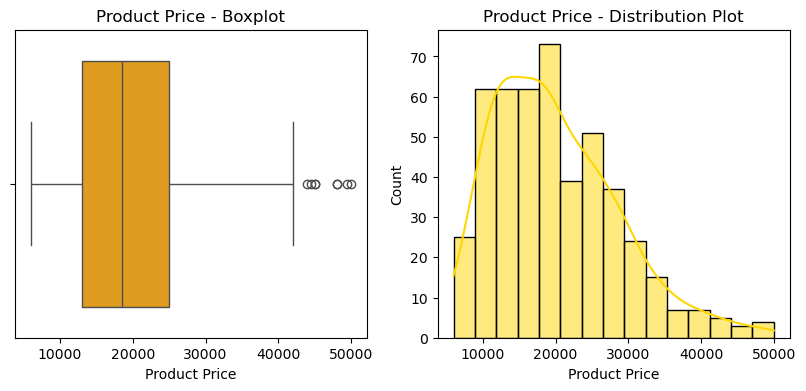

In [68]:
col1 = 'Product Price'

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x=df_clean[col1], color='orange')
plt.title(f"{col1} - Boxplot")

plt.subplot(1,2,2)
sns.histplot(df_clean[col1], kde=True, color='gold')
plt.title(f"{col1} - Distribution Plot")
plt.show()

### 2. Univariate Analysis — Product ROM

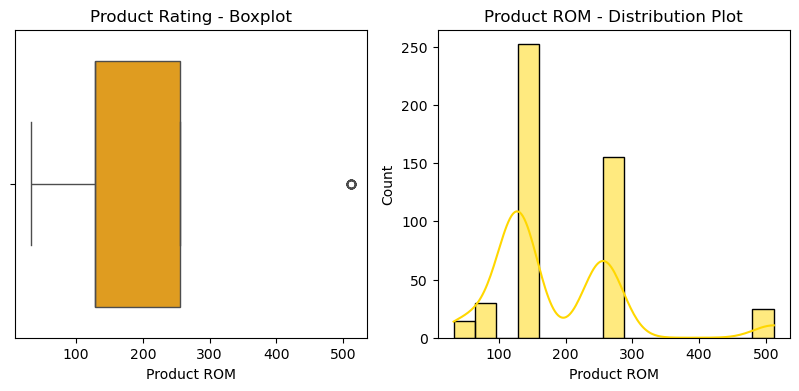

In [69]:
col2 = 'Product ROM'

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x=df_clean[col2], color='orange')
plt.title(f"{col} - Boxplot")

plt.subplot(1,2,2)
sns.histplot(df_clean[col2], kde=True, color='gold')
plt.title(f"{col2} - Distribution Plot")
plt.show()

### 3. Univariate Analysis — Product Rating

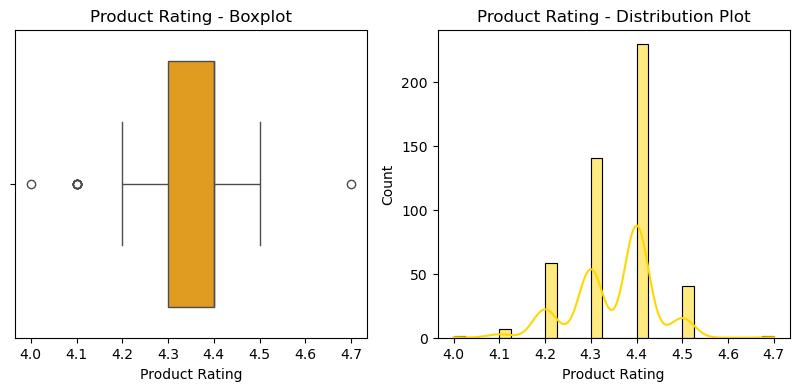

In [70]:
col3 = 'Product Rating'

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x=df_clean[col3], color='orange')
plt.title(f"{col3} - Boxplot")

plt.subplot(1,2,2)
sns.histplot(df_clean[col3], kde=True, color='gold')
plt.title(f"{col3} - Distribution Plot")
plt.show()

### 4. Univariate Analysis — Product RAM

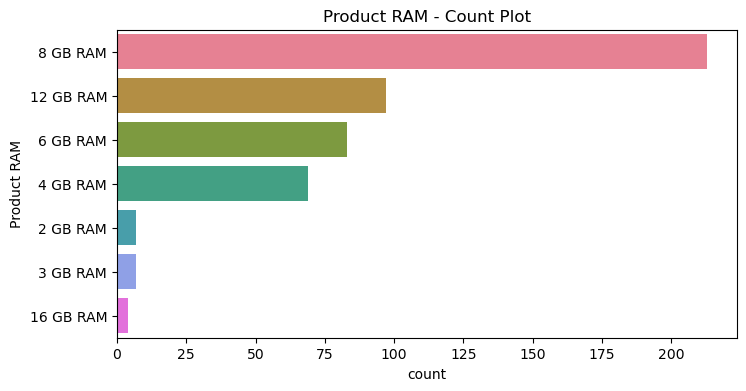

In [71]:
col4 = 'Product RAM'

plt.figure(figsize=(8,4))
sns.countplot(y=df[col4], order=df[col4].value_counts().index, palette='husl')
plt.title(f"{col4} - Count Plot")
plt.show()

## Bivariate Analysis

### 1. Bivariate Analysis — Product Price vs Product Rating

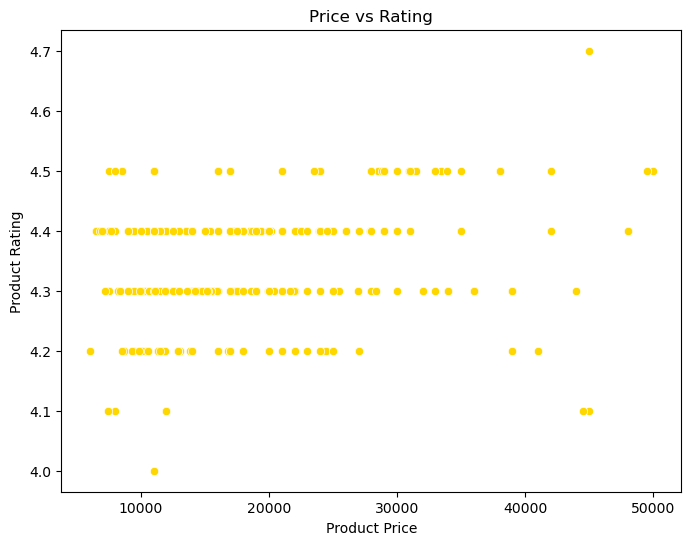

In [72]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Product Price', y='Product Rating', data=df_clean, color='gold')
plt.title('Price vs Rating')
plt.xlabel('Product Price')
plt.ylabel('Product Rating')
plt.show()

### 2. Bivariate Analysis — Product RAM vs Product Price

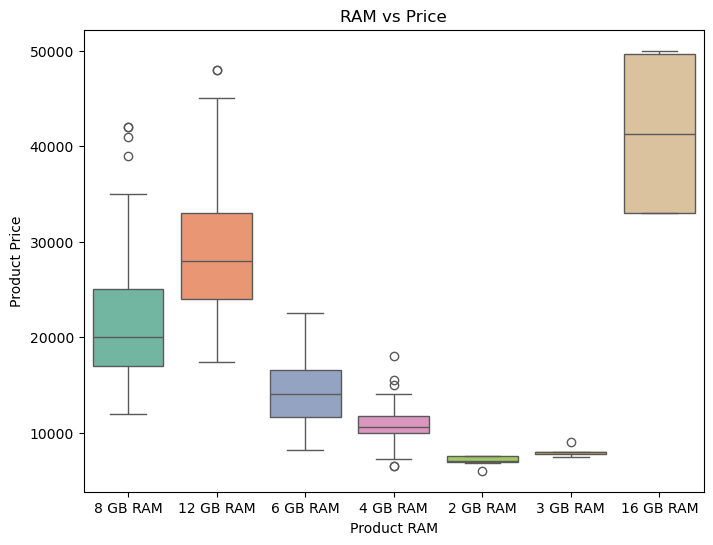

In [73]:
plt.figure(figsize=(8,6))
sns.boxplot(
    x='Product RAM', 
    y='Product Price', 
    data=df_clean, 
    order=df['Product RAM'].value_counts().index, 
    palette='Set2'
)
plt.title('RAM vs Price')
plt.xlabel('Product RAM')
plt.ylabel('Product Price')
plt.show()

### 3. Bivariate Analysis — Product ROM vs Product Price

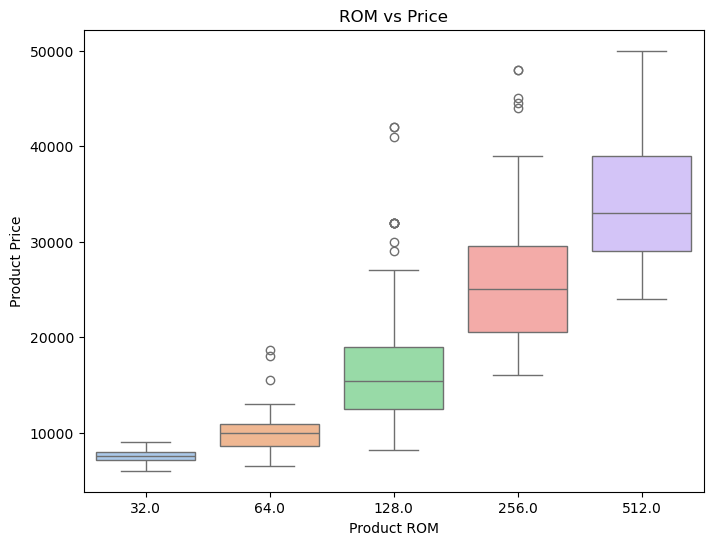

In [74]:
plt.figure(figsize=(8,6))
sns.boxplot(
    x='Product ROM', 
    y='Product Price', 
    data=df_clean, 
    palette='pastel'
)
plt.title('ROM vs Price')
plt.xlabel('Product ROM')
plt.ylabel('Product Price')
plt.show()

### 4. Bivariate Analysis — Product Name vs Product Rating

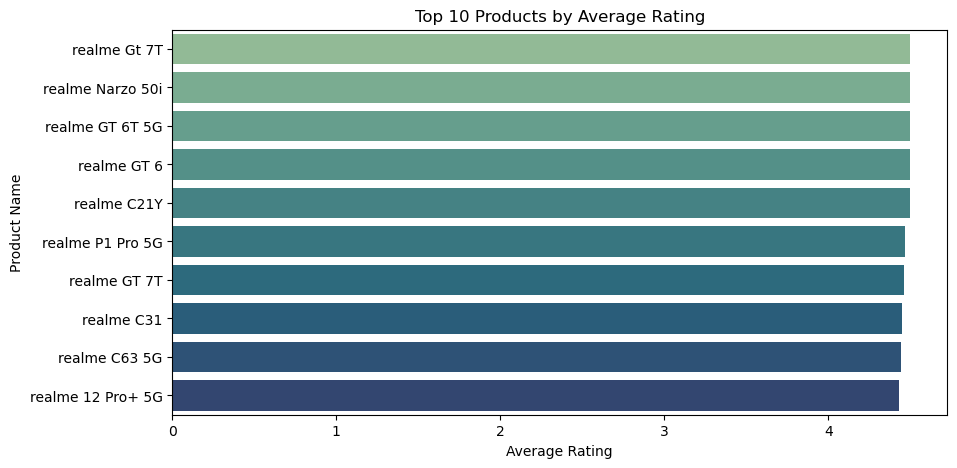

In [75]:
# Average rating by product name
avg_rating = (
    df_clean.groupby('Product Name')['Product Rating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
sns.barplot(
    x=avg_rating.values, 
    y=avg_rating.index, 
    palette='crest'
)
plt.title('Top 10 Products by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Product Name')
plt.show()